In [1]:
%pylab inline
from requests import post
from app.analysis import Quote
def screen_securities(after=None):
    query = 'query screen($limit:[SecurityLimitOptionInput!]!,$after:String){viewer{screenSecurities(filterTypes:EQUITY,limit:$limit,sort:{type:MARKET_CAP,direction:DESC},first:100,after:$after){pageInfo{hasNextPage,endCursor},edges{node{symbol}}}}}'
    variables = {'limit':[{'type':'MARKET_CAP','min':32000000000,'inclusive':True}],'after':after}
    r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
    cursor = r['data']['viewer']['screenSecurities']['pageInfo']['endCursor']
    return [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['screenSecurities']['edges']], cursor
s1, after = screen_securities()
s2, after = screen_securities(after)
symbols = s1 + s2 + screen_securities(after)[0]
quote = Quote(symbols, 75, 21)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-04-22 to 2019-07-05 - 293


In [2]:
stats = quote.statistics()
stats = stats[(stats['shrp'] > 0.2) & (stats['len'] == stats['len'].max())]
print(len(stats))
stats

147


,len,mean,std,shrp,drawdown
Symbols,,,,,
RELX,32,5.473692,1.325200,4.004698,1.928484
AFL,32,6.296931,1.540885,3.978406,1.987710
SRE,32,5.019755,1.233361,3.934850,3.899611
NVS,32,7.764794,2.377899,3.195311,2.543104
PFE,32,4.762512,1.464152,3.138913,1.968784
SO,32,3.804128,1.177450,3.089271,2.686291
BSX,32,8.583547,3.117402,2.699966,3.772070
LMT,32,5.062683,1.835460,2.667461,3.150072
CHTR,32,3.859767,1.440104,2.564467,2.952823


evicted PYPL 0.9029964036122486
evicted KDP 0.8176155789201768
evicted NVO 0.921778644836681
evicted V 0.9390887878473275
evicted ROP 0.9466554278758683
evicted APD 0.9040733844222093
evicted BX 0.9417998566280776
evicted CSCO 0.9388882282295936
evicted CCI 0.826458705425798
evicted PGR 0.834382238661444
evicted TEAM 0.8710021237215527
evicted RELX 0.704474453054614
evicted ADBE 0.9323857817646575
evicted KO 0.9404189216321672
evicted TRV 0.8069463782937505
evicted RDS-A 0.8240772483457303
evicted LIN 0.9137473026651197
evicted TD 0.920540065738208
evicted UNH 0.7164494208390111
evicted CL 0.8565260669634346
evicted SNY 0.841962631492173
evicted KMI 0.7229209070022791
evicted PEP 0.8218008889525922
evicted GSK 0.9085891332457731
evicted PNC 0.9230635816475244
evicted UN 0.8146441937179992
evicted ALL 0.9473951908139995
evicted MDT 0.7967453417258291
evicted SPGI 0.9426712638025262
evicted AEP 0.8812976089076289
evicted NEE 0.8401812159848879
evicted NGG 0.9422979692973135
evicted WBK 0

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,32.0,6.092822,0.543046,5.182797,5.640390,6.004419,6.383561,7.224343,10.912797,1.949091
HDB,32.0,6.882521,2.710147,1.893744,4.917754,6.862667,8.500793,11.672037,2.478040,4.170487
RACE,32.0,9.386342,3.769781,2.813751,6.434669,9.385291,12.127804,17.107105,2.445680,4.771160
CME,32.0,7.189558,3.422828,1.287900,5.327498,6.827757,9.162904,13.829748,2.051781,5.487742
WP,32.0,4.046336,2.388189,-0.871533,2.363312,4.010864,5.298913,8.195854,1.624523,3.342046
AIG,32.0,6.614102,4.945844,0.550696,2.748485,4.192860,10.546915,16.751498,1.303607,3.668206
BBD,32.0,6.870744,6.435177,-6.342565,3.711461,6.911142,11.739446,16.416282,1.041786,12.267247
ILMN,32.0,8.391364,8.931817,-3.954996,-1.077555,12.131183,15.677394,22.273803,0.920831,7.658514
JCI,32.0,3.089517,3.283417,-2.041340,0.032095,2.758540,6.143866,9.465607,0.890185,3.603832
MNST,32.0,3.537716,4.685091,-3.144067,-0.192367,2.930086,5.469506,15.954157,0.719527,8.070388


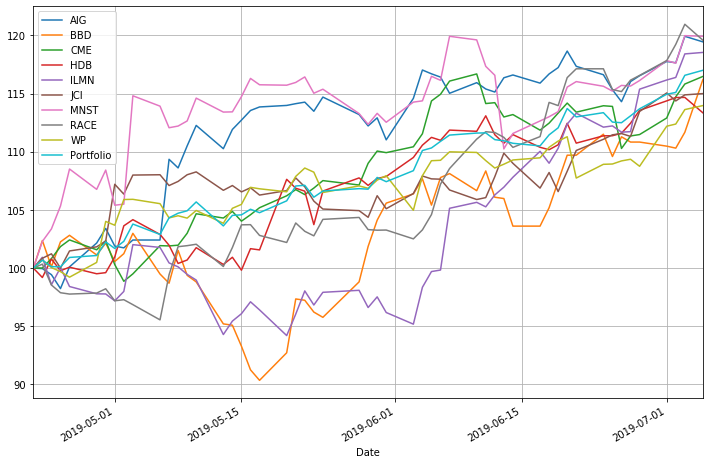

In [3]:
quote.setup_mask(stats.index)
ratio = quote.optimize_portfolio()
print(ratio)
quote.setup_mask(ratio)
quote.graph(ratio)